<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/Rosenbrock%2C%20Newton's%20method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

Earlier we tried to minimize the Rosenbrock function using the steepest-descent method, where the descent direction is set to $-\nabla f$. Now we use the Newton direction $-(\nabla^2f)^{-1}\nabla f$, evaluated at the present location.

In [2]:
import matplotlib.pylab as plt
import numpy as np

Consider the Rosenbrock function
$$f(x,y)=10(y-x^2)^2 + (1-x)^2$$
with gradient
$$\nabla f = \left[\begin{array}{c}
40x^3 - 40xy +2x - 2 \\\
20(y-x^2)
\end{array}\right]$$
and Hessian
$$\nabla^2 f = \left[
\begin{array}{c}
120x^2-40y+2 & -40x \\\
-40x & 20
\end{array}\right]$$
The only minimum is at $(x,y)=(1,1)$ where $f(1,1)=0$.

In [3]:
def objfun(x,y):
    return 10*(y-x**2)**2 + (1-x)**2
def gradient(x,y):
    return np.array([-40*x*y + 40*x**3 -2 + 2*x, 20*(y-x**2)])
def hessian(x,y):
    return np.array([[120*x*x - 40*y+2, -40*x],[-40*x, 20]])

Create a utility function that plots the contours of the Rosenbrock function.

In [19]:
def contourplot(objfun, xmin, xmax, ymin, ymax, ncontours=50, fill=True):

    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x,y)
    Z = objfun(X,Y)
    if fill:
        plt.contourf(X,Y,Z,ncontours,cmap='hot'); # plot the contours
    else:
        plt.contour(X,Y,Z,ncontours); # plot the contours
    plt.scatter(1,1,marker="x",s=50,color="r");  # mark the minimum

Here is a contour plot of the Rosenbrock function, with the global minimum marked with a red cross.

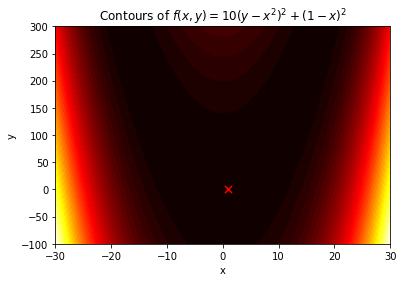

In [20]:
contourplot(objfun, -30,30, -100, 300, fill=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contours of $f(x,y)=10(y-x^2)^2 + (1-x)^2$");

# Line search with Newton's method

First we write a function that uses Newton's method to minimize a given objective function. Starts the solution at position `init`, moves along the Newton direction until the absolute difference between function values drops below `tolerance` or until the number of iterations exceeds `maxiter`.

The step length $\alpha$ is not used here, effectively set to 1.

For efficiency, we use `np.linalg.solve` to determine the descent direction, instead of inverting the Hessian matrix. Inversion is no big deal in this 2D system, but that's a good habit to follow.

The function returns the array of all intermediate positions, and the array of function values.

In [7]:
def newton(objfun, gradient, hessian, init, tolerance=1e-6, maxiter=10000):
    p = init
    iterno = 0
    parray = [p]
    fprev = objfun(p[0],p[1])
    farray = [fprev]
    while iterno < maxiter:
        g = gradient(p[0],p[1])
        h = hessian(p[0],p[1])
        p = p - np.linalg.solve(h,g)
        fcur = objfun(p[0], p[1])
        if np.isnan(fcur):
            break
        parray.append(p)
        farray.append(fcur)
        if abs(fcur-fprev)<tolerance:
            break
        fprev = fcur
        iterno += 1
    return np.array(parray), np.array(farray)

Now let's see how Newton's method behaves with the Rosenbrock function.

## Case 1

In [8]:
p, f = newton(objfun, gradient, hessian, init=[2,4])

Plot the convergence of the solution. Left: The solution points (white) superposed on the contour plot. The star indicates the initial point. Right: The objective function value at each iteration.

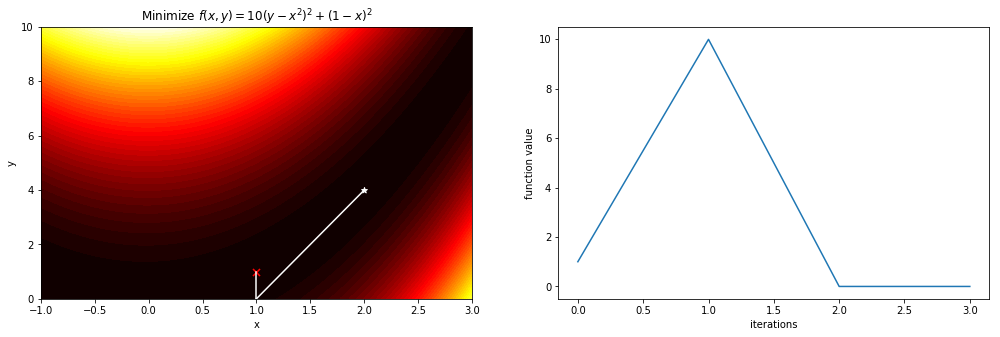

In [21]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -1,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

The minimum is found in only three iterations.

Now let's start at a more difficult location.

In [22]:
p, f = newton(objfun, gradient, hessian, init=[-2,10])

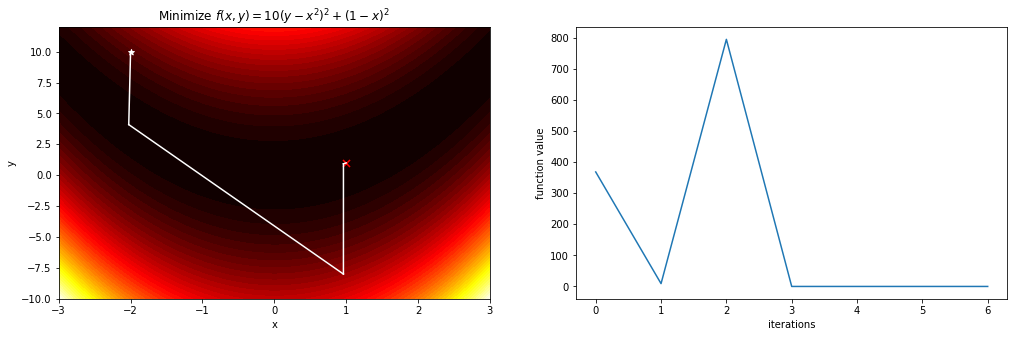

In [24]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -3,3,-10,12)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

Using line search with Newton's method is much more successful compared to steepest descent. It finds the minimum in only a few iterations, and it does not require a step length parameter. The downside is that it requires the knowledge of the Hessian of the objective function. The Hessian is frequently either not available (lack of a closed form for the function, difficult to differentiate, etc.), or it is very costly to evaluate (especially in high dimensions).